In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import scipy.stats

In [2]:
sources = pd.read_csv('/home/machado.35/projects/intro/scripts/sources.csv')
sources = list(sources['sources'])

res_list = [60,90,120,150]
fp = '/data/rubin/machado.35/phangs/rand_results/1e6/'

In [122]:
i=40
res = 150
bins = np.linspace(0,1000,51)
real_data = '/home/machado.35/projects/intro/sources/'+sources[i]+'/'+sources[i]+'_'+str(res)+'pc_cloud_stats.csv'
real_data = pd.read_csv(real_data)['min_dist']
rand_exp = fp+sources[i]+'_exp'+'_'+str(res)+'pc.csv'
rand_exp = pd.read_csv(rand_exp)['nn_dist']
n_it = int(np.floor(len(rand_exp)/len(real_data)))
cpb = np.zeros(shape=(n_it,len(bins)-1))
rnpb = np.zeros(shape=(n_it,len(bins)-1))
for k in range(int(n_it)):
    cpb[k] = np.histogram(rand_exp[k*len(real_data):(k+1)*len(real_data)], bins=bins, density=False)[0]
    #root_n_bin[k] = np.sqrt(cpb[k])

    
#RESULTING cpb is formatted like: cpd[0] is counts for each bin (on 0th iteration)

In [3]:
means = np.zeros(len(cpb[0]))
upper = np.zeros(len(cpb[0]))
lower = np.zeros(len(cpb[0]))
std = np.zeros(len(cpb[0]))
for ii in range(len(cpb[0])):
    means[ii] = np.mean(cpb[:,ii])
    std[ii] = np.std(cpb[:,ii])
    upper[ii] = abs(np.percentile(cpb[:,ii], 84) - np.median(cpb[:,ii]))
    lower[ii] = abs(np.percentile(cpb[:,ii], 16) - np.median(cpb[:,ii]))

NameError: name 'cpb' is not defined

In [124]:
exp = np.histogram(rand_exp, bins=bins)
exp_err = np.sqrt(exp[0])*exp[0]/len(rand_exp)

Text(0.5, 1.0, 'NGC4321 @ 150pc Resolution')

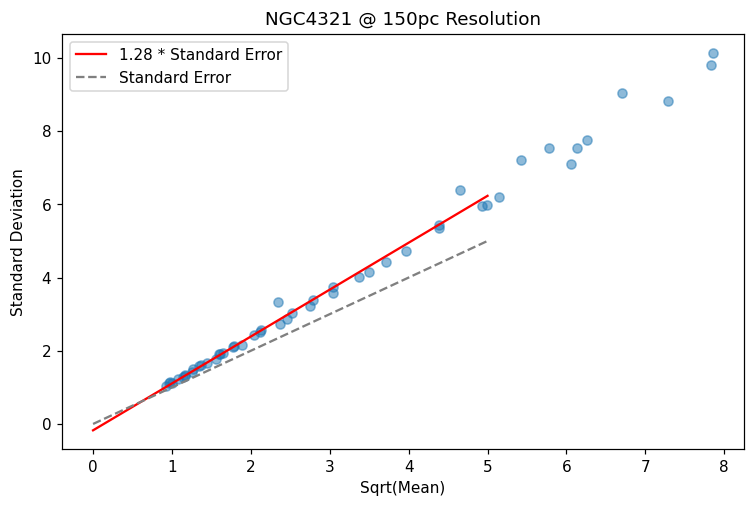

In [125]:
plt.figure(figsize=(8,5), dpi=110)

xs = np.linspace(0,5,100)
reg = scipy.stats.linregress(np.sqrt(means), std)
plt.plot(xs, reg[0]*xs+reg[1], label=str(np.around(reg[0], decimals=2))+' * Standard Error', c='r')
plt.plot([0,5], [0,5], label='Standard Error', ls='--', c='grey')
plt.scatter(np.sqrt(means), std, alpha=0.5)
plt.xlabel('Sqrt(Mean)')
plt.ylabel('Standard Deviation')
plt.legend()
plt.title(sources[i].upper()+' @ '+str(res)+'pc Resolution')

In [126]:
len(real_data)

709

Text(0.5, 1.0, 'Median Counts per Bin (w. 1 sigma scatter) - NGC3621 @ 150pc res in 20pc bins')

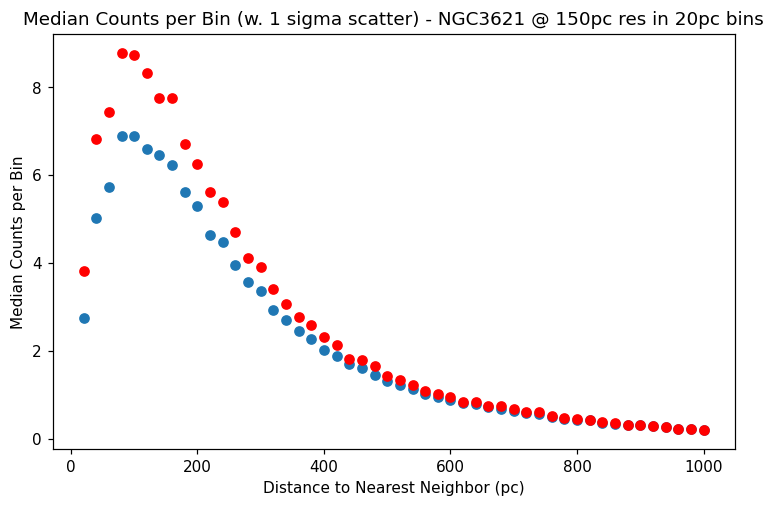

In [51]:
plt.figure(figsize=(8,5), dpi=110)
plt.scatter(bins[1:], np.sqrt(means))
#plt.errorbar(bins[1:], np.sqrt(means), yerr=[lower,upper])
plt.scatter(bins[1:], std, c='r')
plt.xlabel('Distance to Nearest Neighbor (pc)')
plt.ylabel('Median Counts per Bin')
plt.title('Median Counts per Bin (w. 1 sigma scatter) - NGC3621 @ 150pc res in 20pc bins')

Text(0.5, 1.0, '√N/N per 20pc bin - NGC3621 @ 150pc res')

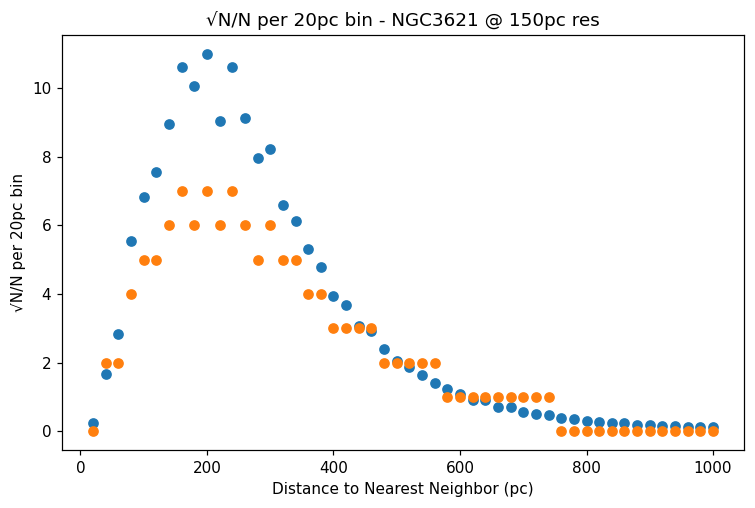

In [115]:
plt.figure(figsize=(8,5), dpi=110)
plt.scatter(bins[1:], exp_err)
plt.scatter(bins[1:], medians)
plt.xlabel('Distance to Nearest Neighbor (pc)')
plt.ylabel('\u221AN/N per 20pc bin')
plt.title('\u221AN/N per 20pc bin - NGC3621 @ 150pc res')

Text(0.5, 1.0, 'Uncertainties in Random Placements (150pc Res)')

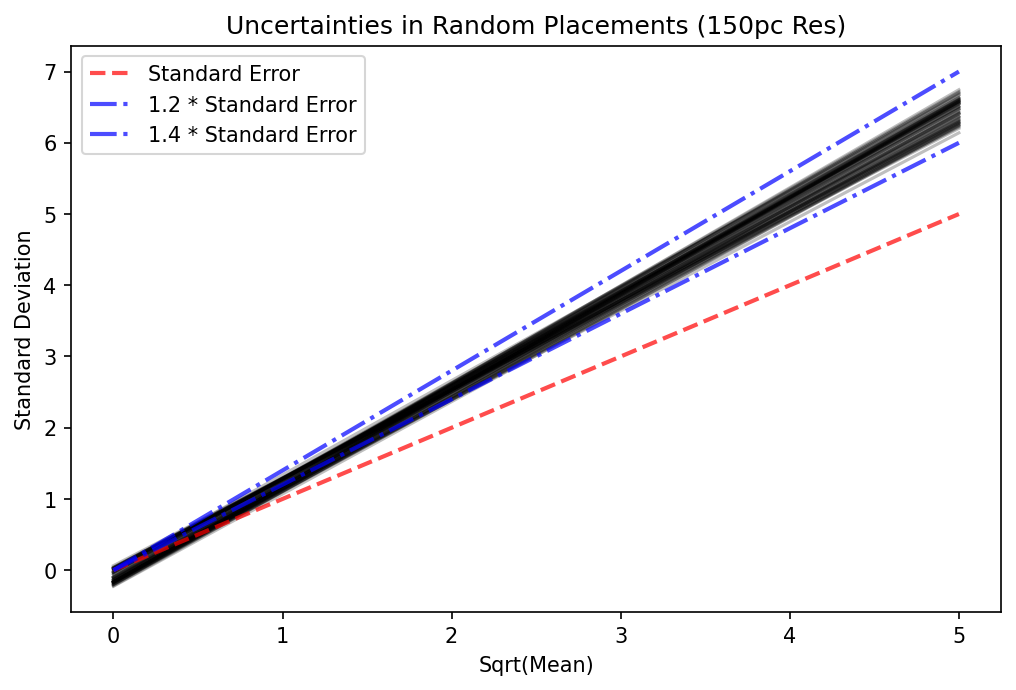

In [6]:
bins = np.linspace(0,1000,51)
plt.figure(figsize=(8,5), dpi=150)
res = res_list[3]
xs = np.linspace(0,5,100)
for i in range(len(sources)):
    real_data = '/home/machado.35/projects/intro/sources/'+sources[i]+'/'+sources[i]+'_'+str(res)+'pc_cloud_stats.csv'
    rand_2d = fp+sources[i]+'_2dcov'+'_'+str(res)+'pc.csv'
    rand_exp = fp+sources[i]+'_exp'+'_'+str(res)+'pc.csv'
    if os.path.isfile(real_data) and os.path.isfile(rand_2d):
        real_data = pd.read_csv(real_data)['min_dist']
        rand_2d = pd.read_csv(rand_2d)['nn_dist']
        rand_exp = pd.read_csv(rand_exp)['nn_dist']
        n_it = int(np.floor(len(rand_exp)/len(real_data)))
        cpb = np.zeros(shape=(n_it,len(bins)-1)) #count per bin
        for k in range(int(n_it)):
            cpb[k] = np.histogram(rand_exp[k*len(real_data):(k+1)*len(real_data)], bins=bins, density=False)[0]
        means = np.zeros(len(cpb[0]))
        upper = np.zeros(len(cpb[0]))
        lower = np.zeros(len(cpb[0]))
        std = np.zeros(len(cpb[0]))
        for ii in range(len(cpb[0])):
            means[ii] = np.mean(cpb[:,ii])
            std[ii] = np.std(cpb[:,ii])
            upper[ii] = abs(np.percentile(cpb[:,ii], 84) - np.median(cpb[:,ii]))
            lower[ii] = abs(np.percentile(cpb[:,ii], 16) - np.median(cpb[:,ii]))
        reg = scipy.stats.linregress(np.sqrt(means), std)
        plt.plot(xs, reg[0]*xs+reg[1], c='black', alpha=0.25)

plt.plot([0,5], [0,5], label='Standard Error', ls='--', c='red', linewidth=2.0, alpha=0.7)
plt.plot(xs, 1.2*xs, label='1.2 * Standard Error', ls='-.', c='b', linewidth=2.0, alpha=0.7)
plt.plot(xs, 1.4*xs, label='1.4 * Standard Error', ls='-.', c='b', linewidth=2.0, alpha=0.7)
plt.xlabel('Sqrt(Mean)')
plt.ylabel('Standard Deviation')
plt.legend()
plt.title('Uncertainties in Random Placements (150pc Res)')

Text(0.5, 1.0, 'Uncertainties in Random Placements (60pc Res)')

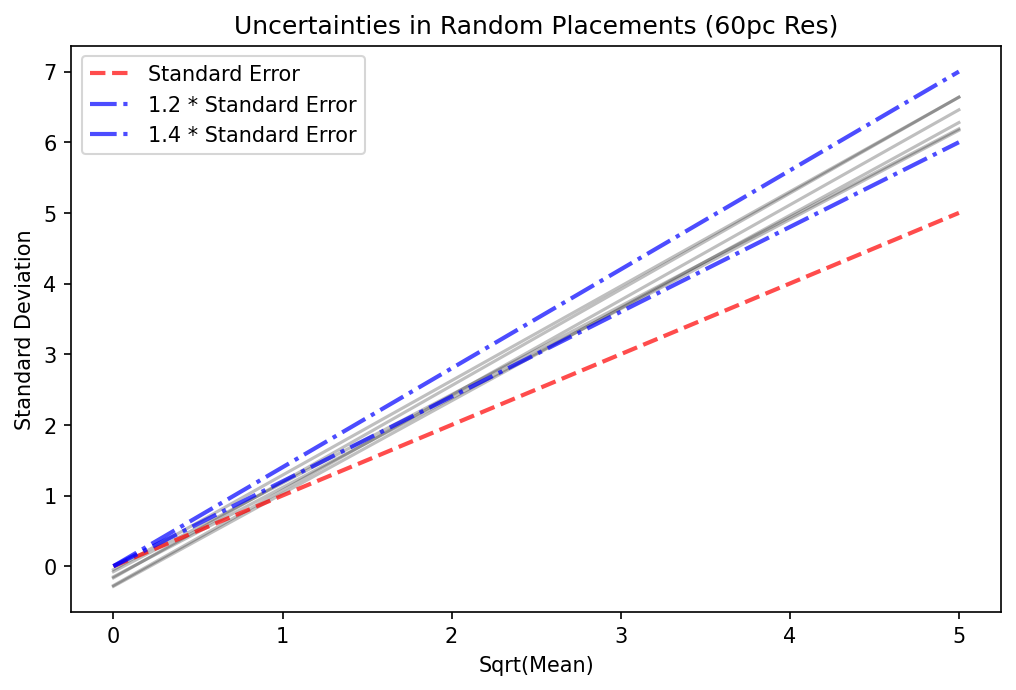

In [7]:
bins = np.linspace(0,1000,51)
plt.figure(figsize=(8,5), dpi=150)
res = res_list[0]
xs = np.linspace(0,5,100)
for i in range(len(sources)):
    real_data = '/home/machado.35/projects/intro/sources/'+sources[i]+'/'+sources[i]+'_'+str(res)+'pc_cloud_stats.csv'
    rand_2d = fp+sources[i]+'_2dcov'+'_'+str(res)+'pc.csv'
    rand_exp = fp+sources[i]+'_exp'+'_'+str(res)+'pc.csv'
    if os.path.isfile(real_data) and os.path.isfile(rand_2d):
        real_data = pd.read_csv(real_data)['min_dist']
        rand_2d = pd.read_csv(rand_2d)['nn_dist']
        rand_exp = pd.read_csv(rand_exp)['nn_dist']
        n_it = int(np.floor(len(rand_exp)/len(real_data)))
        cpb = np.zeros(shape=(n_it,len(bins)-1)) #count per bin
        for k in range(int(n_it)):
            cpb[k] = np.histogram(rand_exp[k*len(real_data):(k+1)*len(real_data)], bins=bins, density=False)[0]
        means = np.zeros(len(cpb[0]))
        upper = np.zeros(len(cpb[0]))
        lower = np.zeros(len(cpb[0]))
        std = np.zeros(len(cpb[0]))
        for ii in range(len(cpb[0])):
            means[ii] = np.mean(cpb[:,ii])
            std[ii] = np.std(cpb[:,ii])
            upper[ii] = abs(np.percentile(cpb[:,ii], 84) - np.median(cpb[:,ii]))
            lower[ii] = abs(np.percentile(cpb[:,ii], 16) - np.median(cpb[:,ii]))
        reg = scipy.stats.linregress(np.sqrt(means), std)
        plt.plot(xs, reg[0]*xs+reg[1], c='black', alpha=0.25)

plt.plot([0,5], [0,5], label='Standard Error', ls='--', c='red', linewidth=2.0, alpha=0.7)
plt.plot(xs, 1.2*xs, label='1.2 * Standard Error', ls='-.', c='b', linewidth=2.0, alpha=0.7)
plt.plot(xs, 1.4*xs, label='1.4 * Standard Error', ls='-.', c='b', linewidth=2.0, alpha=0.7)
plt.xlabel('Sqrt(Mean)')
plt.ylabel('Standard Deviation')
plt.legend()
plt.title('Uncertainties in Random Placements (60pc Res)')

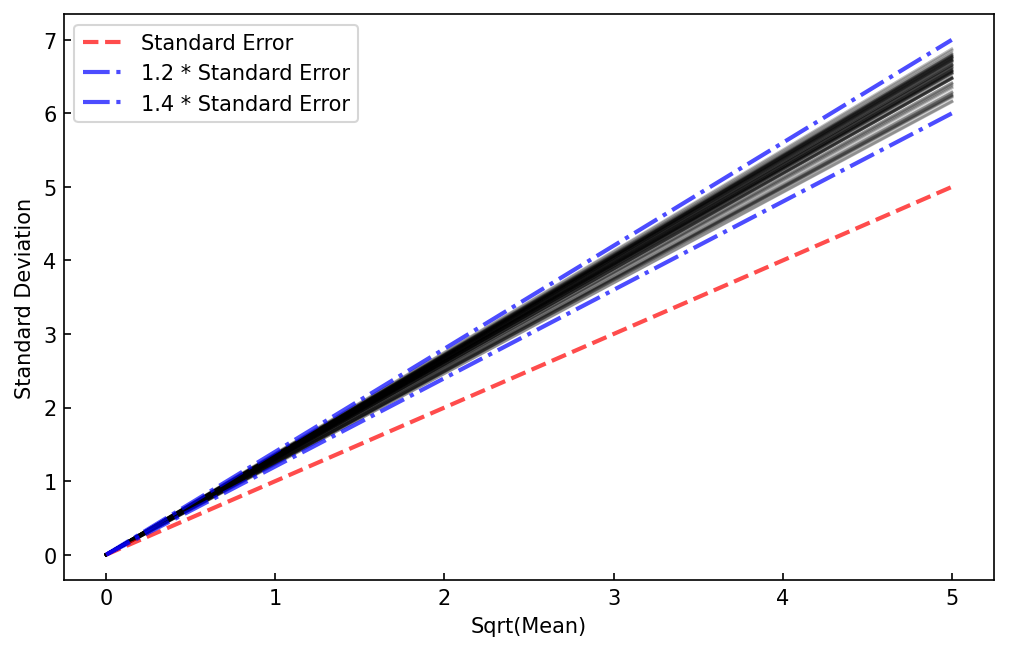

In [4]:
bins = np.linspace(0,1000,51)
plt.figure(figsize=(8,5), dpi=150)
res = res_list[3]
xs = np.linspace(0,5,100)
for i in range(len(sources)):
    real_data = '/home/machado.35/projects/intro/sources/'+sources[i]+'/'+sources[i]+'_'+str(res)+'pc_cloud_stats.csv'
    rand_2d = fp+sources[i]+'_2dcov'+'_'+str(res)+'pc.csv'
    rand_exp = fp+sources[i]+'_exp'+'_'+str(res)+'pc.csv'
    if os.path.isfile(real_data) and os.path.isfile(rand_2d):
        real_data = pd.read_csv(real_data)['min_dist']
        rand_2d = pd.read_csv(rand_2d)['nn_dist']
        rand_exp = pd.read_csv(rand_exp)['nn_dist']
        n_it = int(np.floor(len(rand_exp)/len(real_data)))
        cpb = np.zeros(shape=(n_it,len(bins)-1)) #count per bin
        for k in range(int(n_it)):
            cpb[k] = np.histogram(rand_exp[k*len(real_data):(k+1)*len(real_data)], bins=bins, density=False)[0]
        means = np.zeros(len(cpb[0]))
        upper = np.zeros(len(cpb[0]))
        lower = np.zeros(len(cpb[0]))
        std = np.zeros(len(cpb[0]))
        for ii in range(len(cpb[0])):
            means[ii] = np.mean(cpb[:,ii])
            std[ii] = np.std(cpb[:,ii])
            upper[ii] = abs(np.percentile(cpb[:,ii], 84) - np.median(cpb[:,ii]))
            lower[ii] = abs(np.percentile(cpb[:,ii], 16) - np.median(cpb[:,ii]))
        reg = scipy.stats.linregress(np.sqrt(means), std)
        plt.plot(xs, reg[0]*xs, c='black', alpha=0.25)

plt.plot([0,5], [0,5], label='Standard Error', ls='--', c='red', linewidth=2.0, alpha=0.7)
plt.plot(xs, 1.2*xs, label='1.2 * Standard Error', ls='-.', c='b', linewidth=2.0, alpha=0.7)
plt.plot(xs, 1.4*xs, label='1.4 * Standard Error', ls='-.', c='b', linewidth=2.0, alpha=0.7)
plt.xlabel('Sqrt(Mean)')
plt.ylabel('Standard Deviation')
plt.legend()
plt.tick_params(axis='both', which='both', direction='in')
plt.savefig('/home/machado.35/papers/gmc_spacing/rand_uncertainty_150pc.pdf')
#plt.title('Uncertainties in Random Placements (150pc Res)')